# Example to visualize Global Land Surface Temperature


### Import libraries

In [1]:
import xarray as xr

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

<hr>

## Load data file in netCDF formalt with the xarray library

In [2]:
file = './c_gls_LST_202307120000_GLOBE_GEO_V2.1.2.nc'
file_xr = xr.open_dataset(file)
file_xr

<xarray.Dataset>
Dimensions:              (time: 1, lat: 3584, lon: 8064)
Coordinates:
  * lat                  (lat) float64 80.0 79.96 79.91 ... -79.87 -79.91 -79.96
  * lon                  (lon) float64 -180.0 -180.0 -179.9 ... 179.9 180.0
  * time                 (time) datetime64[ns] 2023-07-12
Data variables:
    ERRORBAR_LST         (time, lat, lon) float32 ...
    LST                  (time, lat, lon) float32 ...
    PERCENT_PROC_PIXELS  (time, lat, lon) float32 ...
    Q_FLAGS              (time, lat, lon) float32 ...
    TIME_DELTA           (time, lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/31)
    Conventions:                CF-1.6
    institution:                IPMA
    archive_facility:           VITO
    source:                     Data was derived from satellite imagery.
    history:                    2023-07-12T00:32:44Z - Product generation
    comment:                    Land Surface Temperature (LST) is the radiati...
    ...                         ...
    copyright:                  Copernicus Service Information 2023
    references:                 https://land.copernicus.eu/global/products/lst
    platform:                   HIMAWARI9, GOES16, MSG3, MSG2
    sensor:                     AHI, ABI, SEVIRI, SEVIRI
    product_version:            V2.1.2
    contacts:                   https://land.copernicus.eu/global/contact

## Extract the variable 'LST' from the xarray Dataset

In [3]:
lst = file_xr['LST']
lst

<xarray.DataArray 'LST' (time: 1, lat: 3584, lon: 8064)>
[28901376 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 80.0 79.96 79.91 79.87 ... -79.87 -79.91 -79.96
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time     (time) datetime64[ns] 2023-07-12
Attributes:
    valid_range:            [-7000  8000]
    standard_name:          surface_temperature
    long_name:              Land Surface Temperature
    units:                  K
    cell_methods:           area:mean where land
    ancillary_variables:    Q_FLAGS, ERRORBAR_LST, TIME_DELTA, PERCENT_PROC_P...
    coverage_content_type:  physicalMeasurement
    grid_mapping:           crs

## Simple visualization with xarray's built-in plotting function

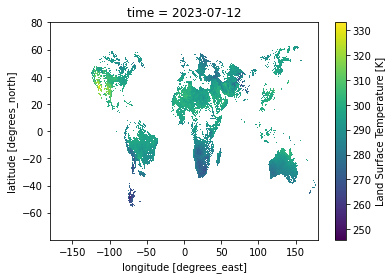

In [4]:
lst.plot()

## Visualize the global Land Surface Temperature with Python's matplotlib and Cartopy

Text(0.5, 1.0, 'Land Surface Temperature - 12 July 2023')

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:842: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:848: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:5392: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert th

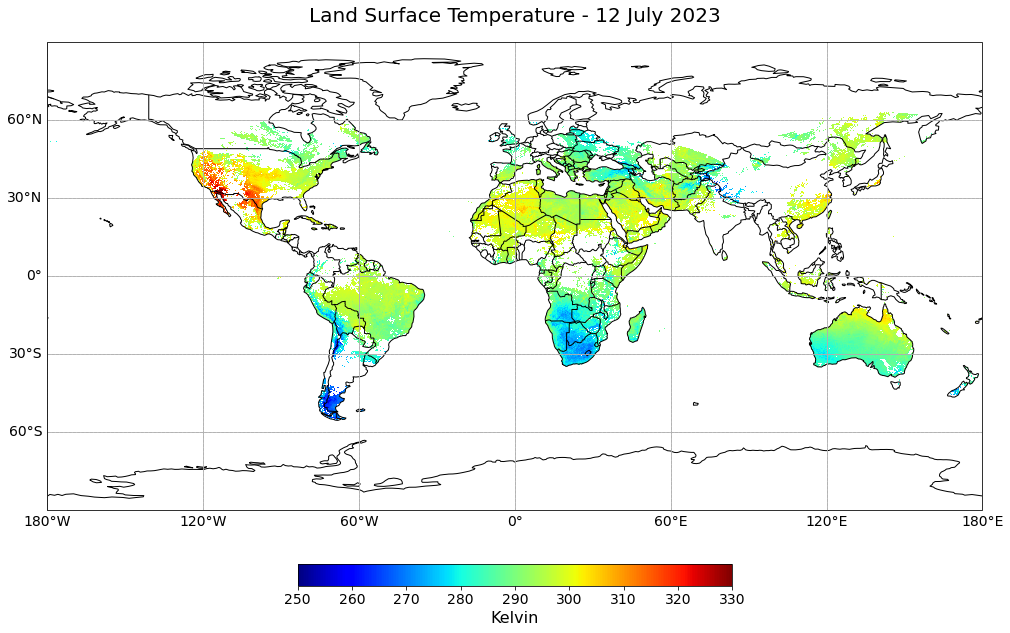

In [5]:
fig=plt.figure(figsize=(20, 10))

ax = plt.axes(projection=ccrs.PlateCarree())
   
img = plt.pcolormesh(lst.lon, 
                     lst.lat, 
                     lst[0,:,:],
                     cmap=plt.get_cmap('jet'), 
                     transform=ccrs.PlateCarree(),
                     vmin=250,
                     vmax=330,
                     shading='auto')

ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

ax.set_global()
ax.gridlines()

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('Kelvin', fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax.set_title('Land Surface Temperature - 12 July 2023', fontsize=20, pad=20.0)